In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("delivery_time.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [6]:
data = data.rename({"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Text(0, 0.5, 'Sorting Time')

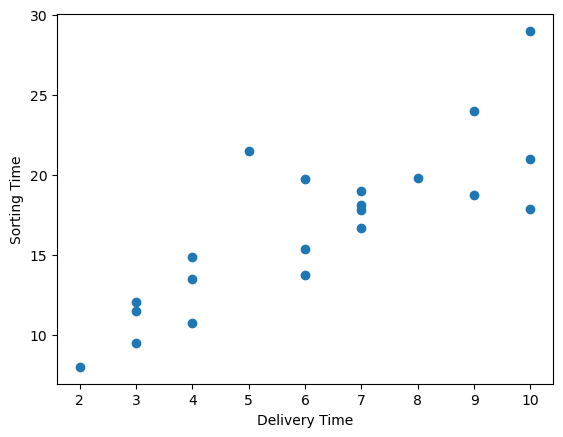

In [7]:
plt.scatter(data['sorting_time'],data['delivery_time'])
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

# Correlation

In [8]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

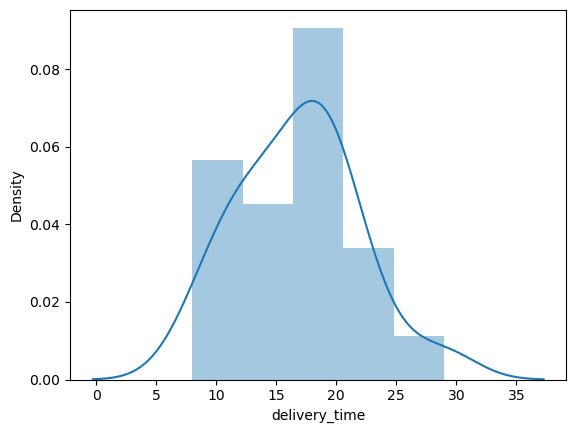

In [9]:
sns.distplot(data['delivery_time'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

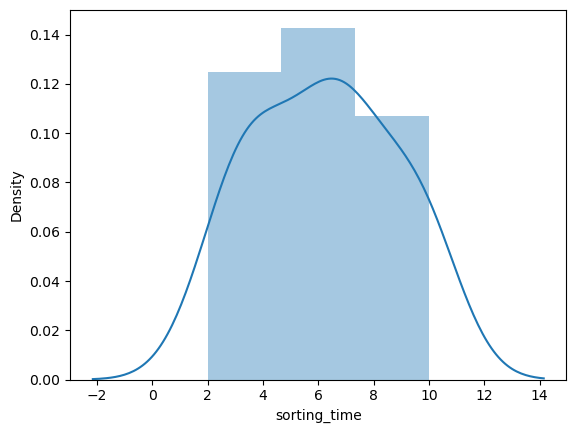

In [10]:
sns.distplot(data['sorting_time'])

<AxesSubplot:>

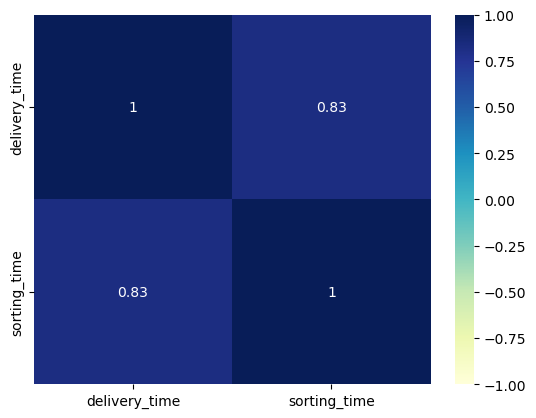

In [11]:
sns.heatmap(data=data.corr(), cmap='YlGnBu', vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='delivery_time'>

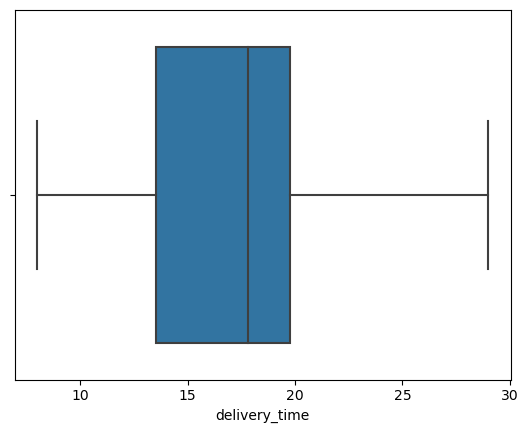

In [17]:
sns.boxplot(x='delivery_time', data=data)

<AxesSubplot:xlabel='sorting_time'>

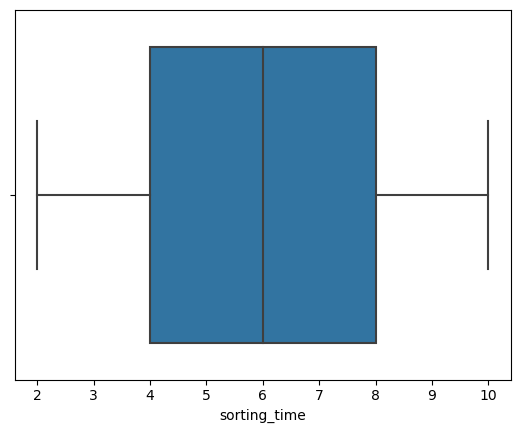

In [18]:
sns.boxplot(x='sorting_time', data=data)

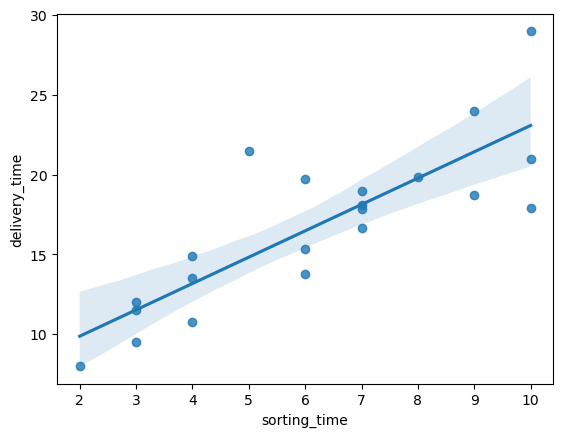

In [19]:
sns.regplot(x="sorting_time", y="delivery_time", data=data);

In [20]:
import statsmodels.api as sm

In [21]:
X= data[['sorting_time']]
Y= data[['delivery_time']]

X=sm.add_constant(X)
X.head()

,const,sorting_time
0,1.0,10
1,1.0,4
2,1.0,6
3,1.0,9
4,1.0,10


In [22]:
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        22:48:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Coefficients
model.params

const           6.582734
sorting_time    1.649020
dtype: float64

In [24]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

const           3.823349
sorting_time    6.387447
dtype: float64 
 const           0.001147
sorting_time    0.000004
dtype: float64


In [25]:
print('The variation in the independent variable which is explained by the dependent variable is','\n',
      model.rsquared*100,'%')

The variation in the independent variable which is explained by the dependent variable is 
 68.2271474841723 %


In [26]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [27]:
ypred = model.predict(X)
print(ypred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64


Let us add the predicted values as a column to our original dataset.

In [28]:
new_data = data.copy()
new_data['Prediction'] = ypred
new_data.head()

,delivery_time,sorting_time,Prediction
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [29]:
new_data['delivery_time'] - new_data['Prediction']

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

Here, we see that the actual values and the predicted values are quite close.